In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
%matplotlib inline

## Load data

**Global cases**

In [5]:
path = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [6]:
df_cases = pd.read_csv(path)

In [7]:
df_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,906,933,996,1026,1092,1176,1279,1351,1463,1531
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,539,548,562,584,609,634,663,678,712,726
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,696,704,713,717,717,723,723,731,738,738
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,24,24,24,24,25,25,25,25,26


**Global deaths**

In [8]:
path = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

In [9]:
df_deaths = pd.read_csv(path)

In [10]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,30,30,33,36,36,40,42,43,47,50
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,26,26,26,26,27,27,27,27,28
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,364,367,375,384,392,402,407,415,419,425
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,35,35,36,37,37,37,37,40,40,40
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


## Arrange data

**Cases**

In [11]:
df_cases = df_cases.drop(columns=['Province/State', 'Lat', 'Long'])
df_cases = df_cases.groupby('Country/Region').sum().T
df_cases.index = pd.to_datetime(df_cases.index, format='%m/%d/%y')

In [12]:
df_cases = df_cases.diff()[1:]
df_cases.index.name = 'date'
df_cases = df_cases.astype(int)

In [13]:
df_cases.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


**Deaths**

In [14]:
df_deaths = df_deaths.drop(columns=['Province/State', 'Lat', 'Long'])
df_deaths = df_deaths.groupby('Country/Region').sum().T
df_deaths.index = pd.to_datetime(df_deaths.index, format='%m/%d/%y')

In [15]:
df_deaths = df_deaths.diff()[1:]
df_deaths.index.name = 'date'
df_deaths = df_deaths.astype(int)

In [16]:
df_deaths.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Some stats

In [17]:
countries = [
    'Switzerland',
    'Austria',
    'Netherlands',
    'US',
    'Sweden',
    'Singapore',
    'Japan',
    'Taiwan*',
    'Korea, South',
    'China'
]

**Cumulative Numbers**

In [18]:
df_cases.sum()[countries]

Country/Region
Switzerland      29061
Austria          15225
Netherlands      38040
US              965784
Sweden           18640
Singapore        13624
Japan            13439
Taiwan*            428
Korea, South     10737
China            83364
dtype: int64

In [19]:
df_deaths.sum()[countries]

Country/Region
Switzerland      1610
Austria           542
Netherlands      4491
US              54881
Sweden           2194
Singapore          12
Japan             372
Taiwan*             6
Korea, South      243
China            4620
dtype: int64

## Visualize data

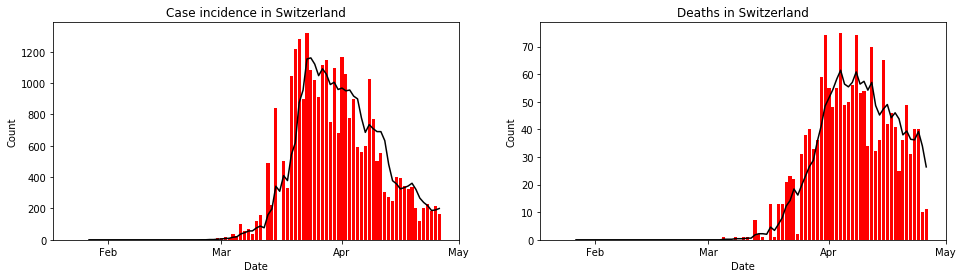

In [20]:
country = 'Switzerland'
color='red'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

data = df_cases
ax1.bar(data.index, data[country], color=color)
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.set_title('Case incidence in ' + country)
ax1.set_ylabel('Count')
ax1.set_xlabel('Date')

data = df_cases.rolling(5).mean()
ax1.plot(data.index, data[country], color='black')

data = df_deaths
ax2.bar(data.index, data[country], color=color)
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax2.set_title('Deaths in ' + country)
ax2.set_ylabel('Count')
ax2.set_xlabel('Date')

data = df_deaths.rolling(5).mean()
ax2.plot(data.index, data[country], color='black')

In [21]:
def countrychart(country, color):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

    data = df_cases
    ax1.bar(data.index, data[country], color=color)
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax1.set_title('Case incidence in ' + country)
    ax1.set_ylabel('Count')
    ax1.set_xlabel('Date')
    
    data = df_cases.rolling(5).mean()
    ax1.plot(data.index, data[country], color='black')

    data = df_deaths
    ax2.bar(data.index, data[country], color=color)
    ax2.xaxis.set_major_locator(mdates.MonthLocator())
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax2.set_title('Deaths in ' + country)
    ax2.set_ylabel('Count')
    ax2.set_xlabel('Date')
    
    data = df_deaths.rolling(5).mean()
    ax2.plot(data.index, data[country], color='black')

### Europe

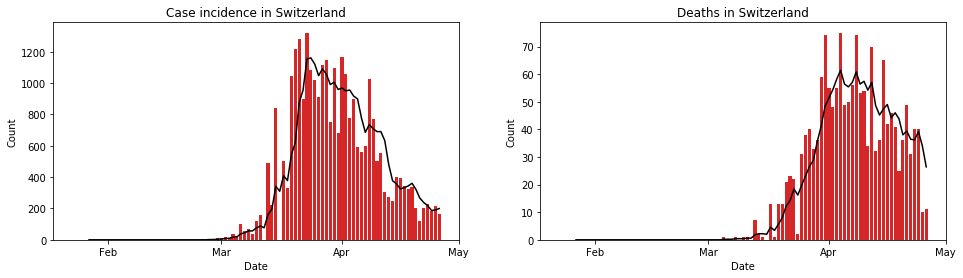

In [22]:
countrychart('Switzerland', 'tab:red')

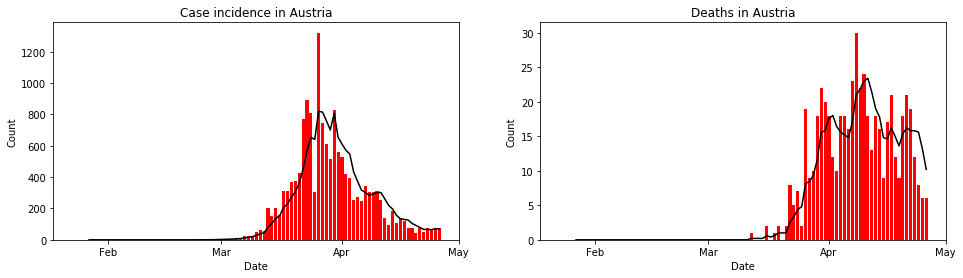

In [23]:
countrychart('Austria', 'red')

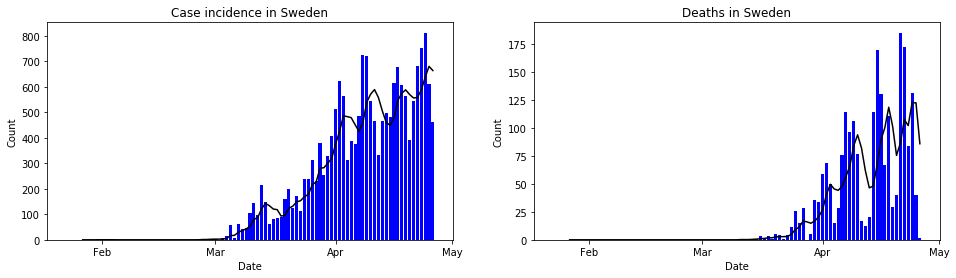

In [24]:
countrychart('Sweden', 'blue')

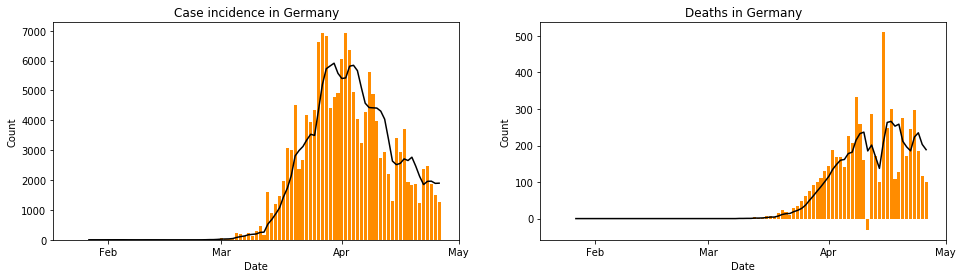

In [25]:
countrychart('Germany', 'darkorange')

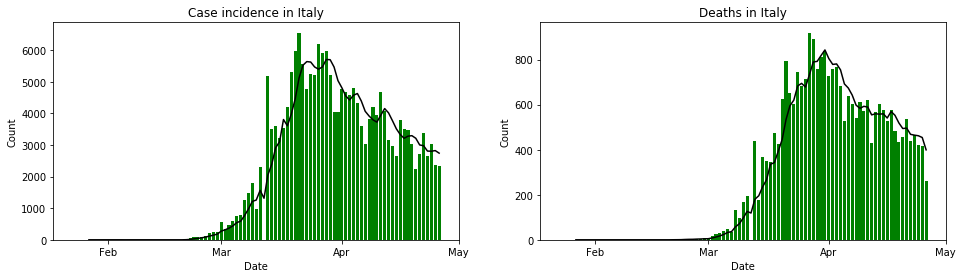

In [26]:
countrychart('Italy', 'green')

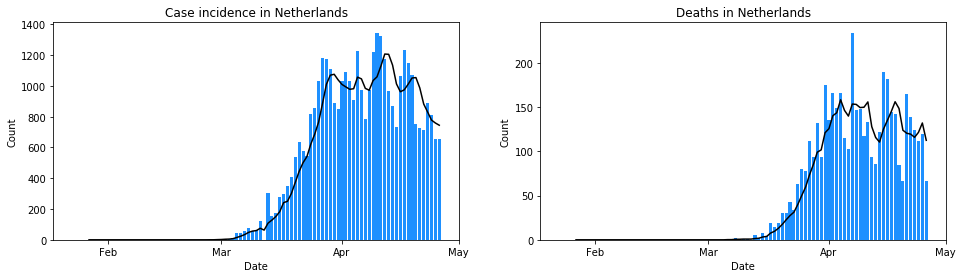

In [27]:
countrychart('Netherlands', 'dodgerblue')

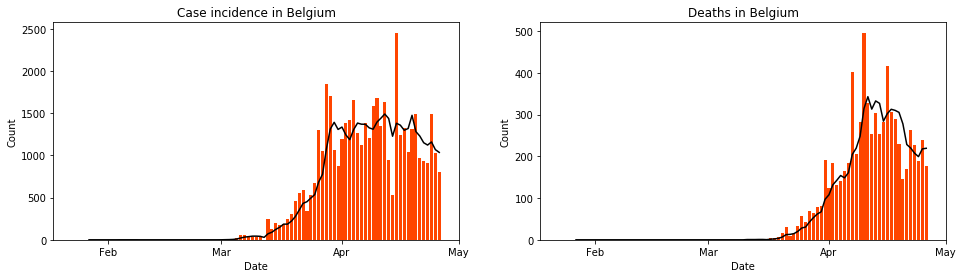

In [28]:
countrychart('Belgium', 'orangered')

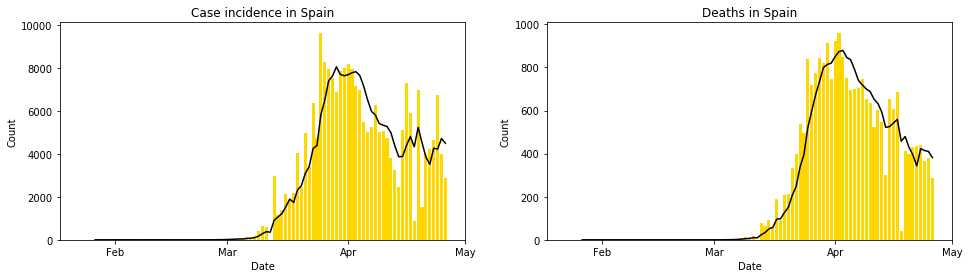

In [29]:
countrychart('Spain', 'gold')

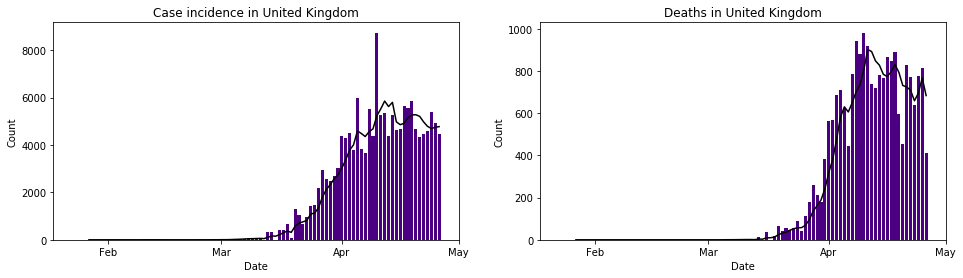

In [30]:
countrychart('United Kingdom', 'indigo')

### Asia

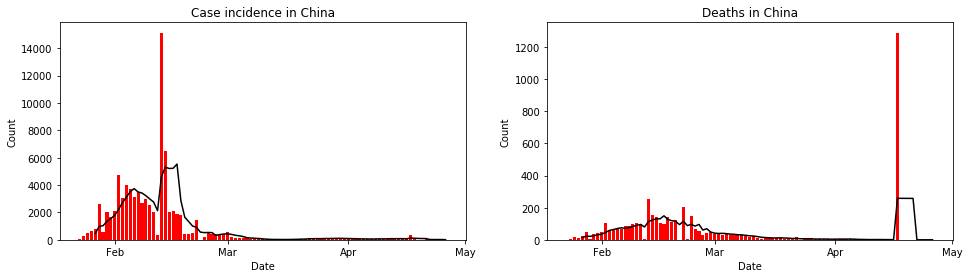

In [31]:
countrychart('China', 'red')

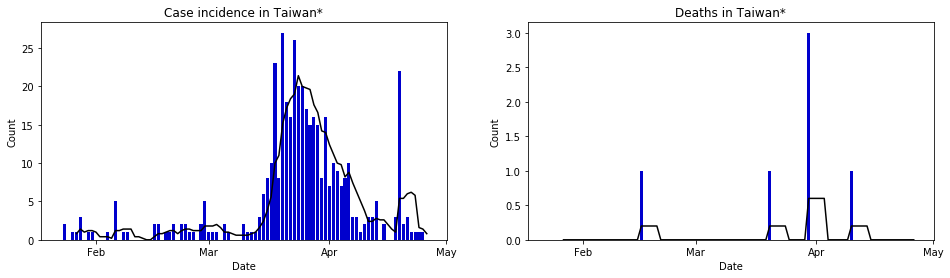

In [32]:
countrychart('Taiwan*', 'mediumblue')

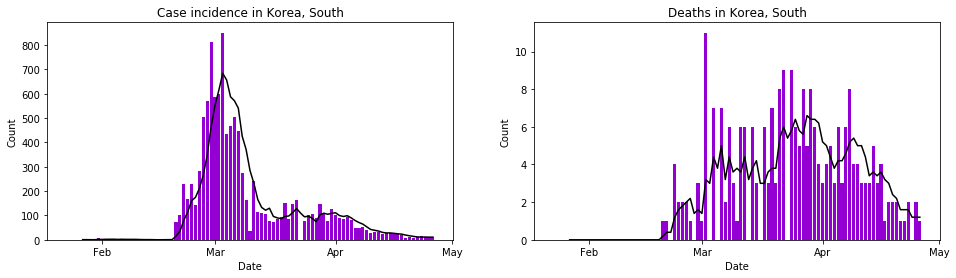

In [33]:
countrychart('Korea, South', 'darkviolet')

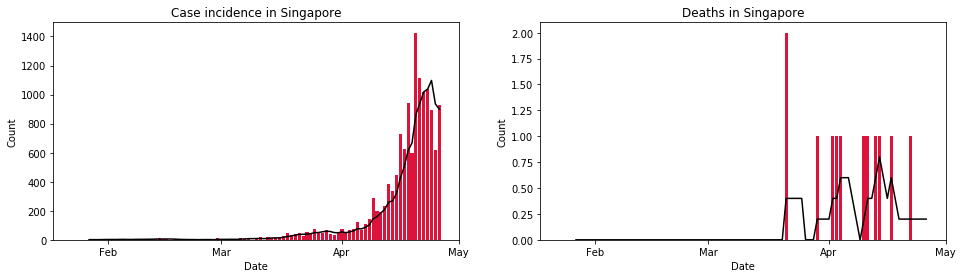

In [34]:
countrychart('Singapore', 'crimson')

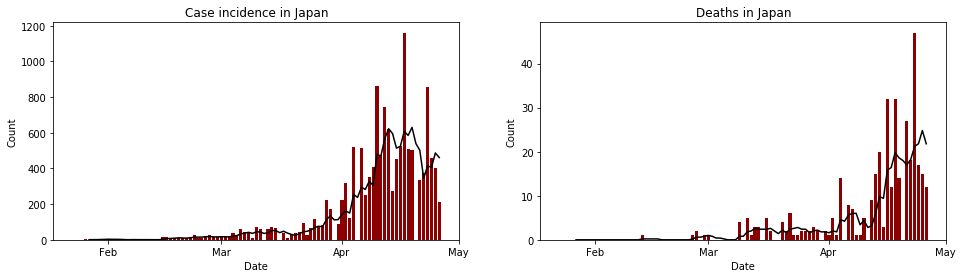

In [35]:
countrychart('Japan', 'darkred')

### Rest of the World

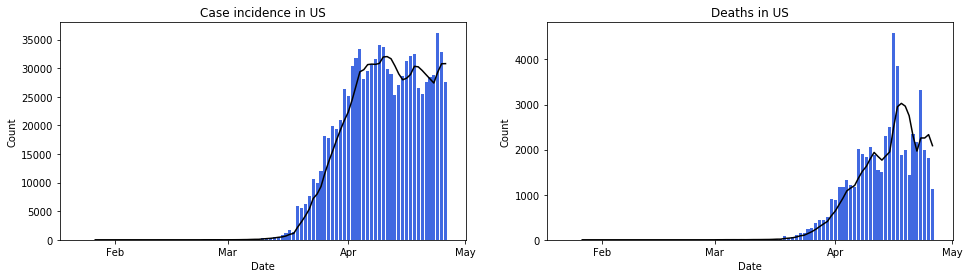

In [36]:
countrychart('US', 'royalblue')

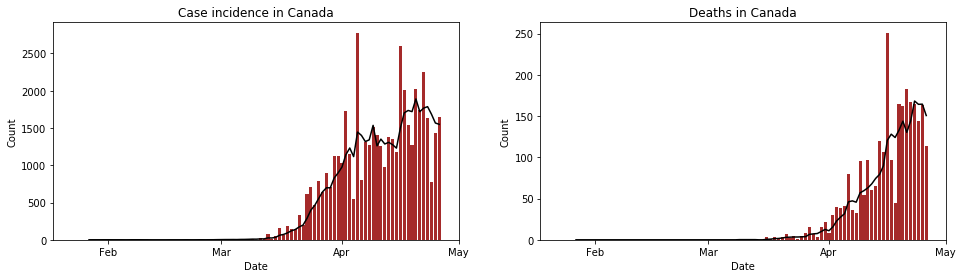

In [37]:
countrychart('Canada', 'brown')

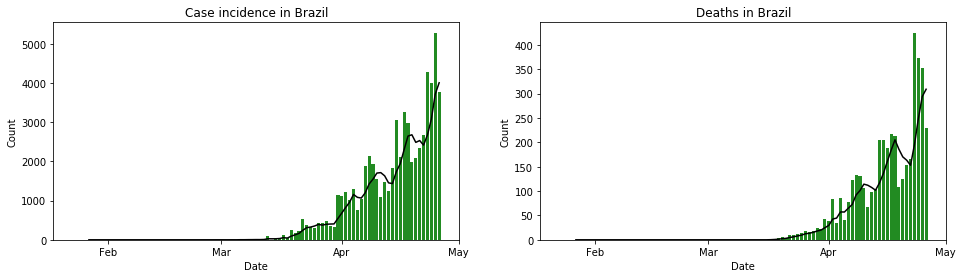

In [38]:
countrychart('Brazil', 'forestgreen')

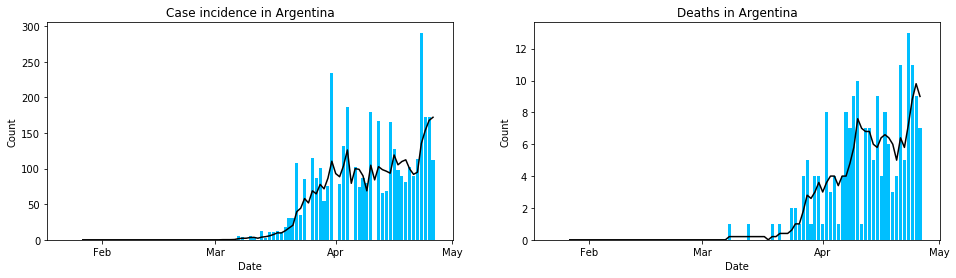

In [39]:
countrychart('Argentina', 'deepskyblue')

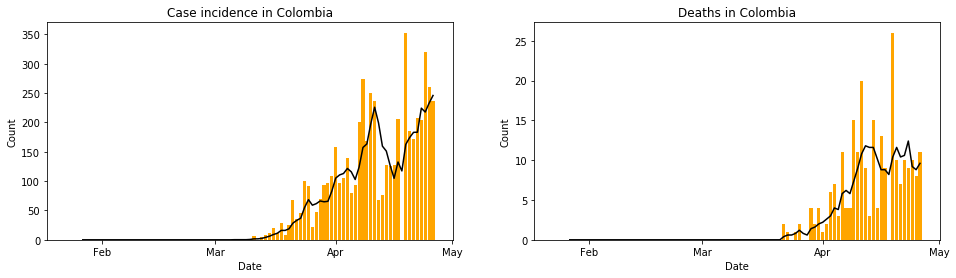

In [40]:
countrychart('Colombia', 'orange')

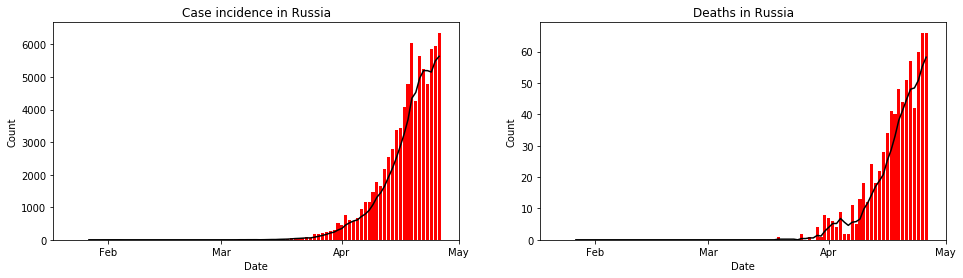

In [41]:
countrychart('Russia', 'red')

## Export

### Case incidence for each country

In [45]:
countries = [
    'Switzerland',
    'Austria',
    'Netherlands',
    'US',
    'Sweden',
    'Singapore',
    'Japan',
    'Taiwan*',
    'Korea, South',
    'China',
    'Russia',
    'Brazil'
]

In [46]:
path = '../charts/'

In [47]:
for country in countries:
    df_cases[[country]].rename(columns={country: 'value'}).to_csv(path + country + '.csv')